In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
print("done")

done


In [4]:
# tk = th.Thicket.from_caliperreader(glob("Semester-Project/Online-Implementation/MPI/**/*.cali"))
tk = th.Thicket.from_caliperreader(glob("Semester-Project/Online-Implementation/MPI/**/*.cali"))
# tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Variance time/rank", "Total time"], axis = 1)
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank"], axis = 1)
print("done")

done


In [5]:
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              4697309          0.516153   
                                                  6026927          1.385908   
                                                  17704802         7.030486   
                                                  20155968         3.299328   
                                                  40625617         1.355073   
                                                  51324399         2.227391   
                                                  52206099         0.833073   
                                                  54575627         7.967232   
                                                  56873092        10.894118   
                                                  58104171         2.482297   
                                                  65250961         1.445451   
                                                  65792131         0.584382   
                                                  72607263         0.829224   
                                                  76485827         0.509898   
                                                  80563294         0.669865   
                                                  92064235         0.397300   
                                                  92986783         1.792149   
                                                  103734426        2.293646   
                                                  122694780        1.501034   
                                                  146893931        2.069642   
                                                  148682306        0.538486   
                                                  162851638        4.927904   
                                                  166991777        0.383713   
                                                  169253784        2.205188   
                                                  239824783        1.481390   
                                                  256165432        0.364326   
                                                  270984511        0.829381   
                                                  292000060        0.289656   
                                                  309414401        1.428721   
                                                  323871508        6.698923   
                                                  337812359        7.876848   
                                                  358296776        0.766919   
                                                  369929905        0.969768   
                                                  437980442        4.034377   
                                                  450720466        7.632972   
                                                  483857412       11.964486   
                                                  496729292        4.977095   
                                                  497836112        1.756994   
                                                  498362935        4.033770   
                                                  522539933        2.167719   
                                                  545912377        0.500331   
                                                  592024767        3.239460   
                                                  612931052        2.207849   
                                                  616154026        1.244313   
                                                  616580386        3.536685   
                                                  625759634        0.373204   
                                                  667507947        2.138935   
                                                  678123138        0.605130   
                                                  678391657        4.456515   
                                 

In [6]:
gb = tk.groupby(["InputSize","InputType"])

28  thickets created...
{(65536, '1%%perturbed'): <thicket.thicket.Thicket object at 0x2b49ddfffb50>, (65536, 'Random'): <thicket.thicket.Thicket object at 0x2b49ddf98910>, (65536, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2b49ddf40a30>, (65536, 'Sorted'): <thicket.thicket.Thicket object at 0x2b49ddfcdd30>, (262144, '1%%perturbed'): <thicket.thicket.Thicket object at 0x2b49de02ce50>, (262144, 'Random'): <thicket.thicket.Thicket object at 0x2b49dde8cac0>, (262144, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2b49ddf91cd0>, (262144, 'Sorted'): <thicket.thicket.Thicket object at 0x2b49ddf91f40>, (1048576, '1%%perturbed'): <thicket.thicket.Thicket object at 0x2b49de05af10>, (1048576, 'Random'): <thicket.thicket.Thicket object at 0x2b49de22da90>, (1048576, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2b49de00fa30>, (1048576, 'Sorted'): <thicket.thicket.Thicket object at 0x2b49de06ba00>, (4194304, '1%%perturbed'): <thicket.thicket.Thicket object at 0x2b49ddff

In [7]:
# gbType = tk.groupby("InputType")
# input_types = gbType.keys()
# dfs = {}
# for key in gbType.keys():
#     thk = gbType[key]
#     gb = thk.groupby("InputSize")
#     ctk = th.Thicket.concat_thickets(
#         thickets=list(gb.values()),
#         headers=list(gb.keys()),
#         axis="columns",
#         metadata_key="num_procs"
#     )

#     ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
#     ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
#     dfs[key] = ctk

# dfs['Random'].dataframe

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [8]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [9]:
ctk.dataframe

(65536, 1%%perturbed) (65536, Random)  \
                                    Avg time/rank   Avg time/rank   
name              num_procs                                         
main              2                      0.577917        0.605130   
                  4                      0.366406        0.373479   
                  8                      0.495006        0.510923   
                  16                     0.786605        0.774973   
                  32                     1.423452        1.428029   
                  64                     1.435710        1.336192   
                  128                    1.445465        1.468273   
                  256                    1.793262        1.672835   
                  512                    2.482297        2.230763   
                  1024                   3.345892        3.299328   
comm              2                      0.001906        0.004841   
                  4                      0.002816        0.005598   
                  8                      0.003763        0.006653   
                  16                     0.010930        0.008206   
                  32                     0.054594        0.052336   
                  64                     0.018676        0.020809   
                  128                    0.027265        0.030026   
                  256                    0.046936        0.041574   
                  512                    0.201356        0.121742   
                  1024                   0.273687        0.269695   
comm_large        2                      0.001291        0.004332   
                  4                      0.001659        0.004613   
                  8                      0.001855        0.005026   
                  16                     0.003325        0.004675   
                  32                     0.003161        0.006954   
                  64                     0.010021        0.011921   
                  128                    0.007413        0.014841   
                  256                    0.019011        0.020345   
                  512                    0.020913        0.028172   
                  1024                   0.008700        0.026750   
comm_small        2                      0.000549        0.000442   
                  4                      0.001094        0.000920   
                  8                      0.001839        0.001561   
                  16                     0.007536        0.003463   
                  32                     0.051364        0.045313   
                  64                     0.008598        0.008824   
                  128                    0.019792        0.015112   
                  256                    0.027856        0.021158   
                  512                    0.180379        0.093500   
                  1024                   0.264917        0.242867   
comp              2                      0.003580        0.008356   
                  4                      0.002563        0.004551   
                  8                      0.002597        0.003197   
                  16                     0.003790        0.003015   
                  32                     0.003360        0.003658   
                  64                     0.003172        0.001613   
                  128                    0.001398        0.001318   
                  256                    0.003612        0.001894   
                  512                    0.003382        0.000932   
                  1024                   0.000141        0.000285   
comp_large        2                      0.003105        0.007654   
                  4                      0.002248        0.003962   
                  8                      0.002351        0.002784   
                  16                     0.003612        0.002771   
                  32                     0.003198        0.003494   
                  64      

In [10]:
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
array_sizes1 = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))

In [11]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    # plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [12]:
array_sizes = []
for pair in array_sizes1:
    array_sizes.append(pair[0])
    
array_sizes = list(set(array_sizes))

print(array_sizes)
print(function_names)

[65536, 262144, 16777216, 1048576, 4194304, 67108864, 268435456]
{'comp', 'comm_large', 'comp_small', 'data_init', 'comm', 'correctness_check', 'comp_large', 'comm_small', 'main'}


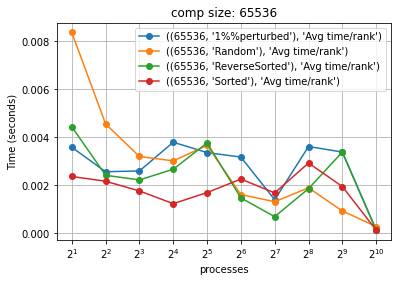

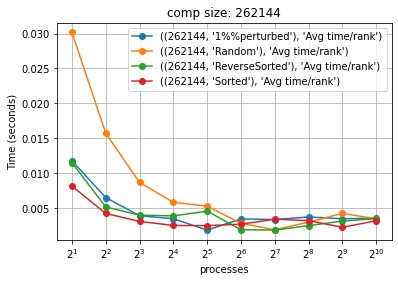

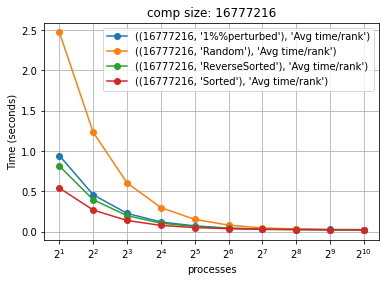

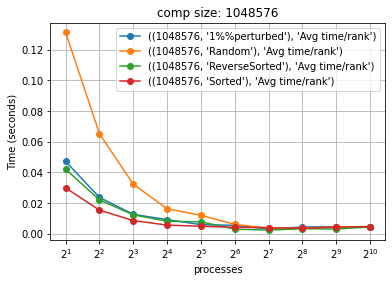

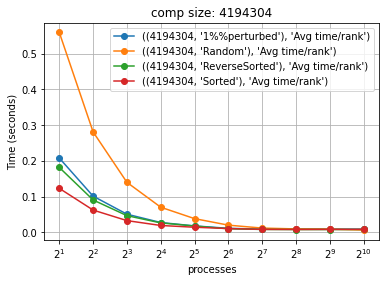

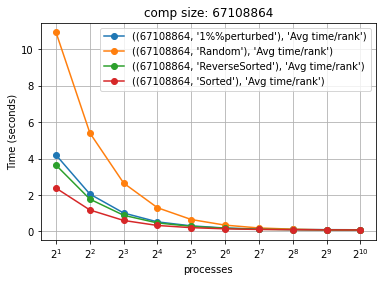

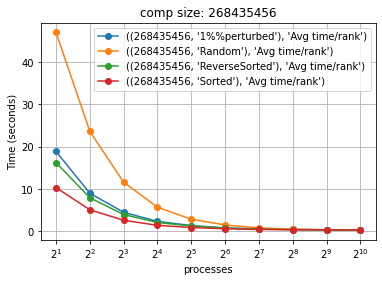

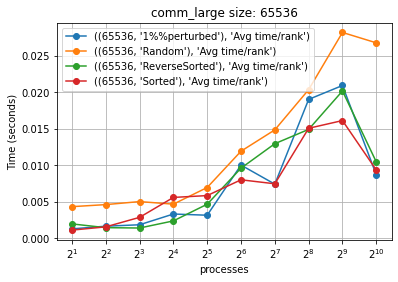

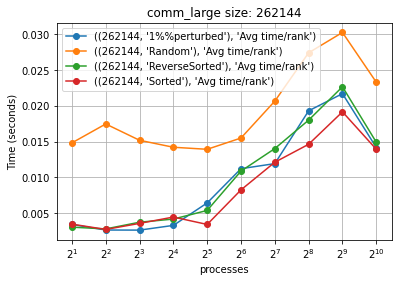

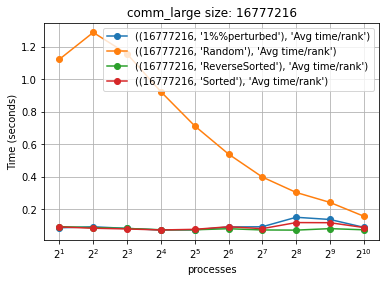

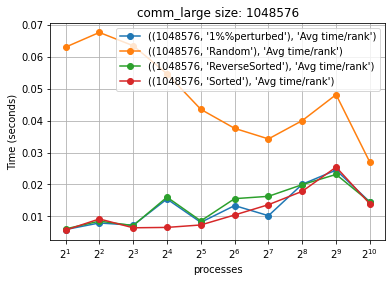

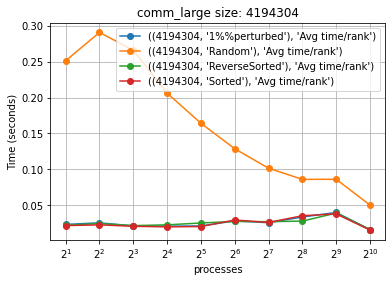

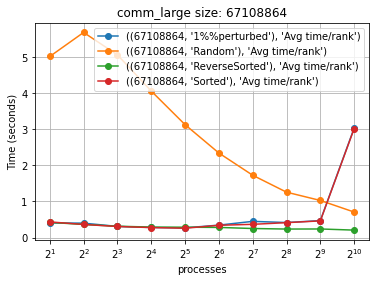

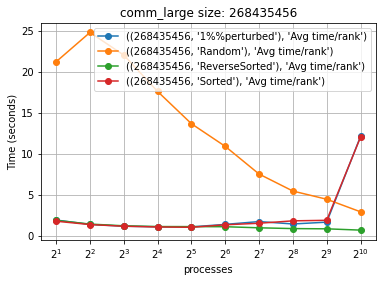

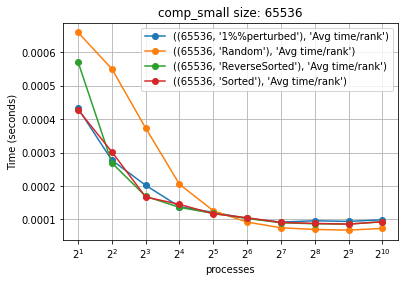

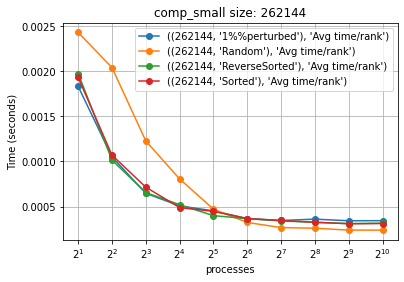

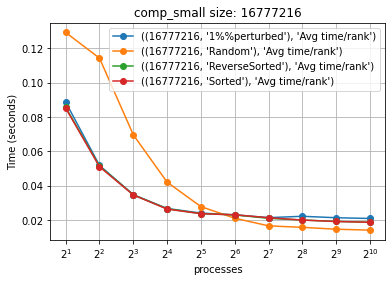

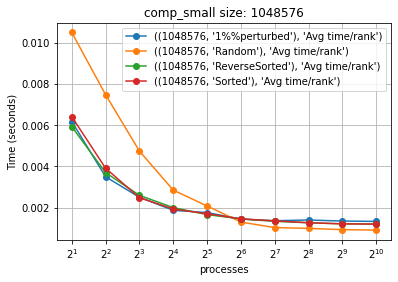

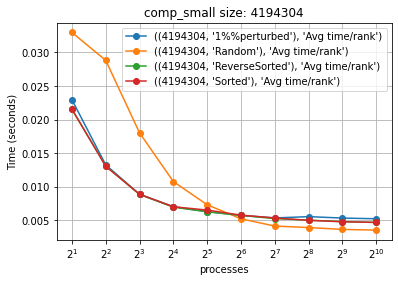

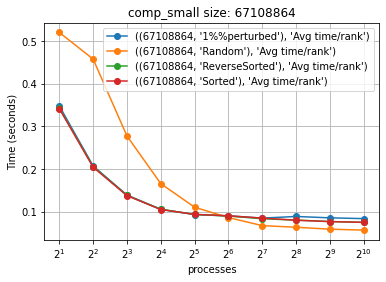

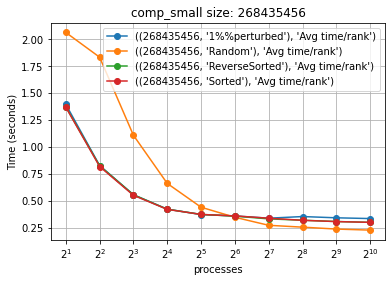

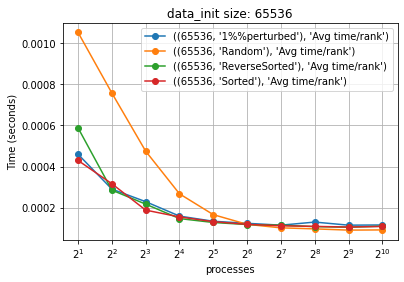

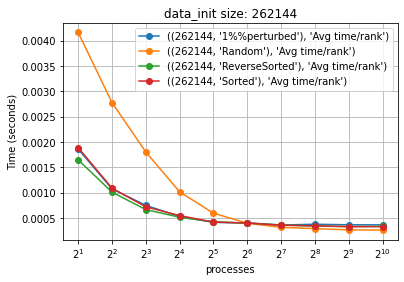

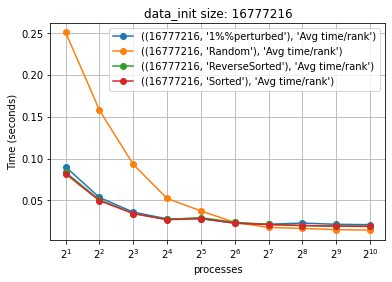

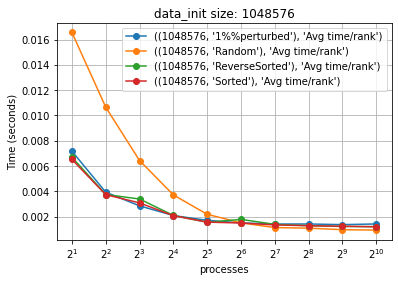

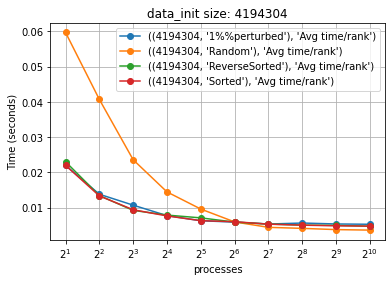

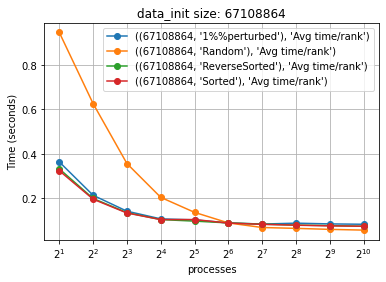

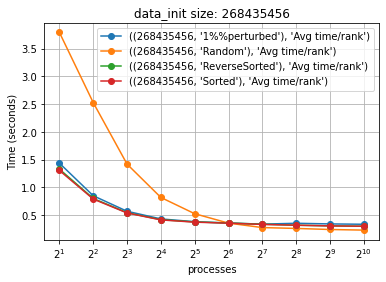

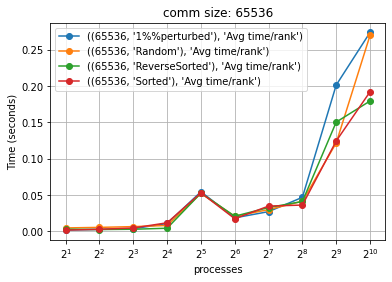

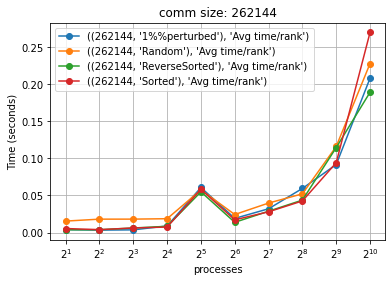

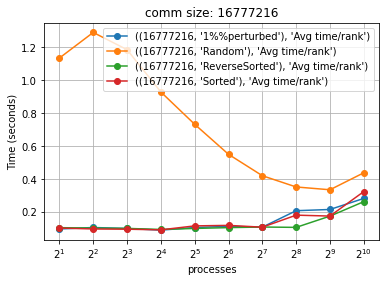

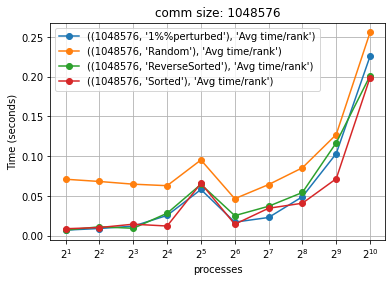

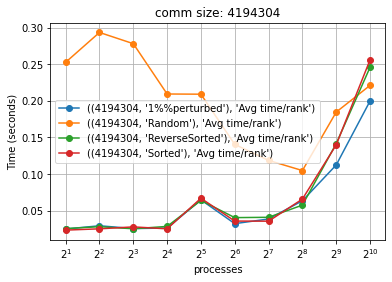

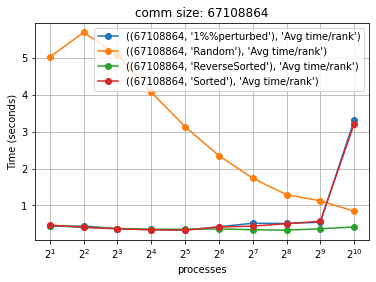

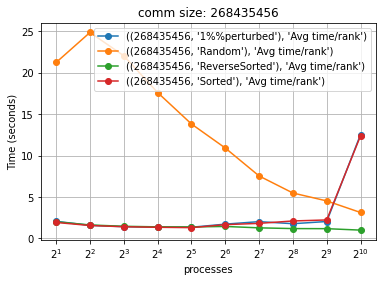

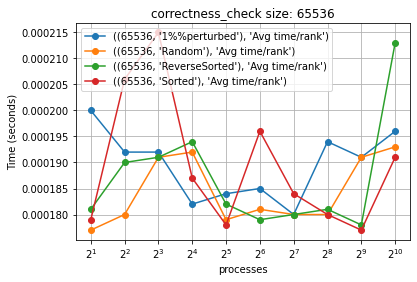

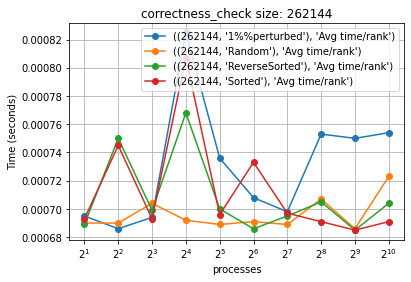

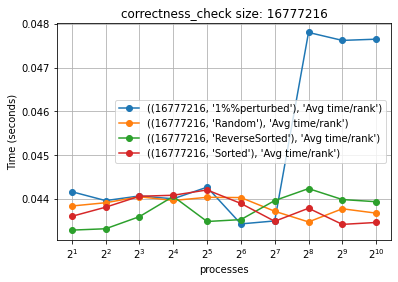

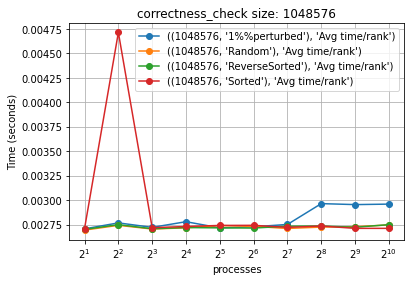

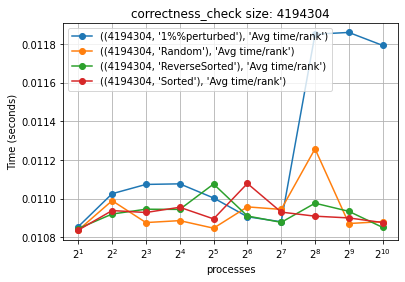

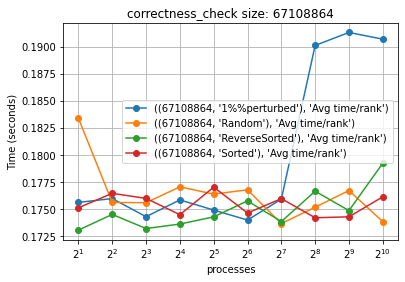

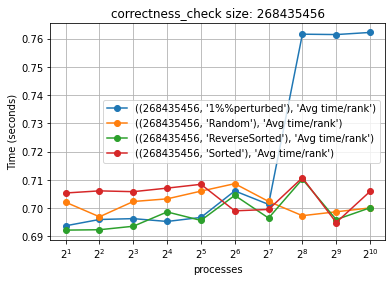

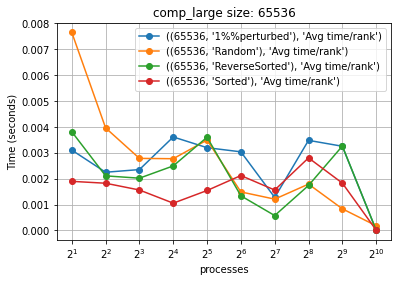

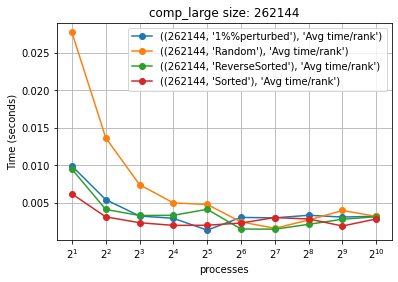

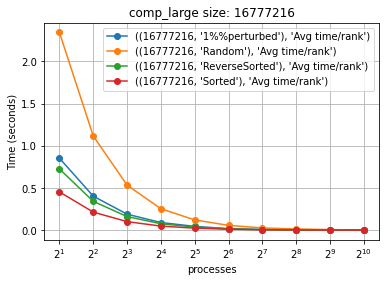

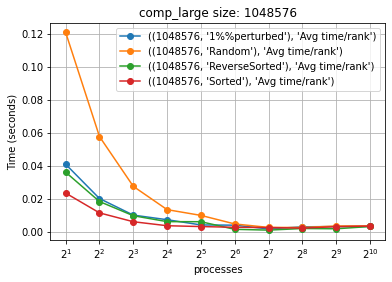

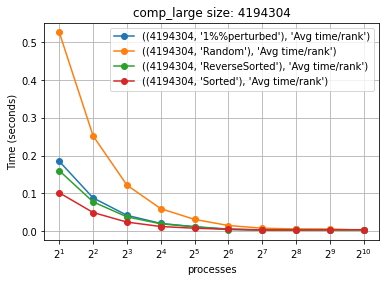

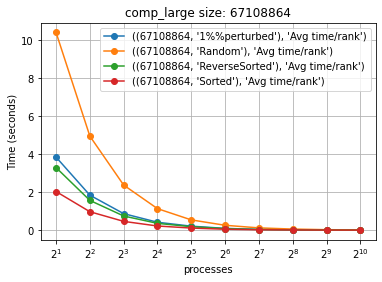

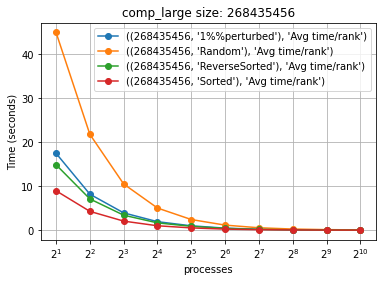

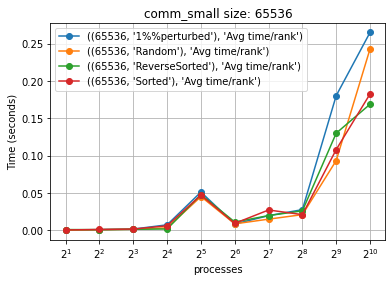

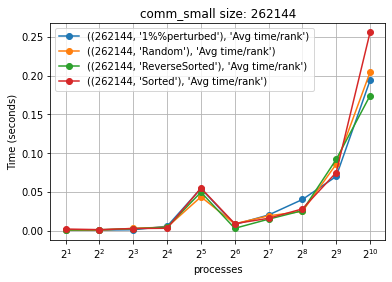

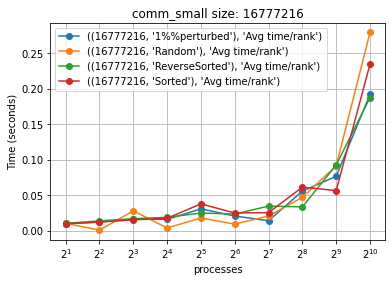

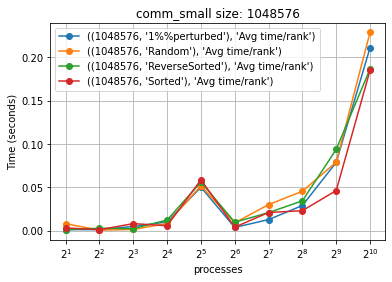

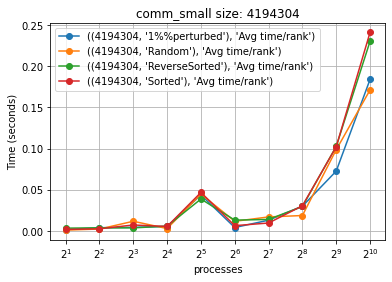

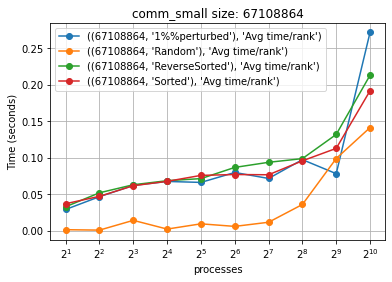

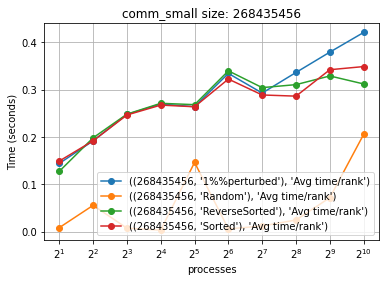

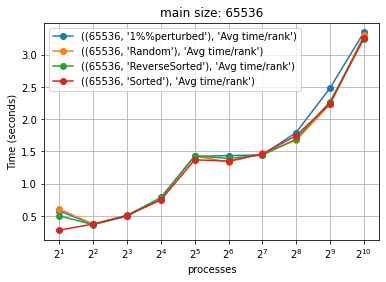

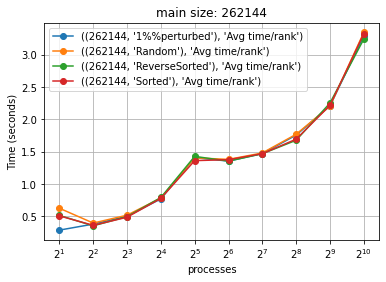

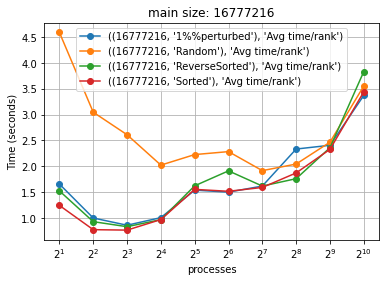

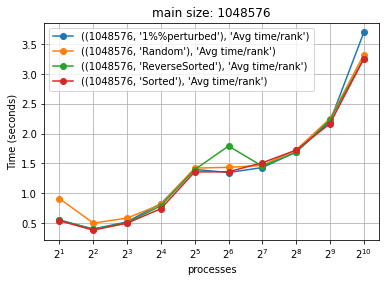

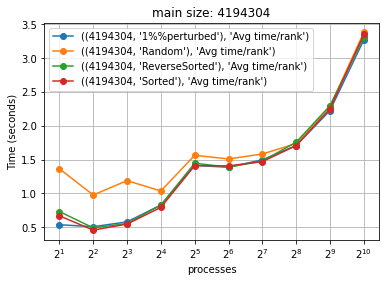

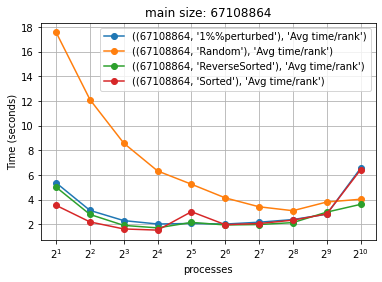

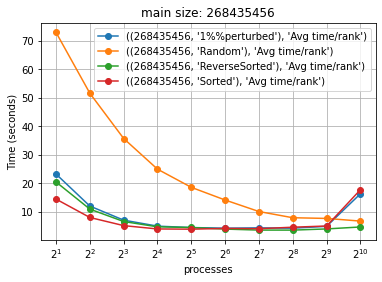

In [13]:
for name in function_names:
    for asize in array_sizes:
        tcols = [col for col in ctk.dataframe.columns if col[0][0] == asize]
        plot_mpl(
            df = ctk.dataframe.loc[name][tcols],
            title = f"{name} size: {asize}",
            xlabel = "processes",
            ylabel = "Time (seconds)"
        )

In [14]:
ctk.dataframe

(65536, 1%%perturbed) (65536, Random)  \
                                    Avg time/rank   Avg time/rank   
name              num_procs                                         
main              2                      0.577917        0.605130   
                  4                      0.366406        0.373479   
                  8                      0.495006        0.510923   
                  16                     0.786605        0.774973   
                  32                     1.423452        1.428029   
                  64                     1.435710        1.336192   
                  128                    1.445465        1.468273   
                  256                    1.793262        1.672835   
                  512                    2.482297        2.230763   
                  1024                   3.345892        3.299328   
comm              2                      0.001906        0.004841   
                  4                      0.002816        0.005598   
                  8                      0.003763        0.006653   
                  16                     0.010930        0.008206   
                  32                     0.054594        0.052336   
                  64                     0.018676        0.020809   
                  128                    0.027265        0.030026   
                  256                    0.046936        0.041574   
                  512                    0.201356        0.121742   
                  1024                   0.273687        0.269695   
comm_large        2                      0.001291        0.004332   
                  4                      0.001659        0.004613   
                  8                      0.001855        0.005026   
                  16                     0.003325        0.004675   
                  32                     0.003161        0.006954   
                  64                     0.010021        0.011921   
                  128                    0.007413        0.014841   
                  256                    0.019011        0.020345   
                  512                    0.020913        0.028172   
                  1024                   0.008700        0.026750   
comm_small        2                      0.000549        0.000442   
                  4                      0.001094        0.000920   
                  8                      0.001839        0.001561   
                  16                     0.007536        0.003463   
                  32                     0.051364        0.045313   
                  64                     0.008598        0.008824   
                  128                    0.019792        0.015112   
                  256                    0.027856        0.021158   
                  512                    0.180379        0.093500   
                  1024                   0.264917        0.242867   
comp              2                      0.003580        0.008356   
                  4                      0.002563        0.004551   
                  8                      0.002597        0.003197   
                  16                     0.003790        0.003015   
                  32                     0.003360        0.003658   
                  64                     0.003172        0.001613   
                  128                    0.001398        0.001318   
                  256                    0.003612        0.001894   
                  512                    0.003382        0.000932   
                  1024                   0.000141        0.000285   
comp_large        2                      0.003105        0.007654   
                  4                      0.002248        0.003962   
                  8                      0.002351        0.002784   
                  16                     0.003612        0.002771   
                  32                     0.003198        0.003494   
                  64      

In [15]:
# ctk.dataframe.loc[[("main", 2), ("main", 8)]]
tdf = ctk.dataframe.loc[[("comp_large", i) for i in [2, 8, 32, 128, 512]], [col for col in ctk.dataframe.columns if col[0][1] == "Random"]]

In [16]:
tdf

(65536, Random) (262144, Random) (1048576, Random)  \
                       Avg time/rank    Avg time/rank     Avg time/rank   
name       num_procs                                                      
comp_large 2                0.007654         0.027677          0.120688   
           8                0.002784         0.007385          0.027457   
           32               0.003494         0.004746          0.009863   
           128              0.001208         0.001567          0.002588   
           512              0.000834         0.003944          0.003432   

                     (4194304, Random) (16777216, Random) (67108864, Random)  \
                         Avg time/rank      Avg time/rank      Avg time/rank   
name       num_procs                                                           
comp_large 2                  0.526412           2.340889          10.413325   
           8                  0.121704           0.535444           2.376200   
           32                 0.030775           0.124179           0.543046   
           128                0.007500           0.028879           0.123319   
           512                0.005172           0.009410           0.028453   

                     (268435456, Random)  
                           Avg time/rank  
name       num_procs                      
comp_large 2                   44.911890  
           8                   10.484569  
           32                   2.415414  
           128                  0.547660  
           512                  0.124460

In [17]:
# tdf.drop(columns=[((67108864, 'Random'), 'Avg time/rank'), ((268435456, 'Random'), 'Avg time/rank')])
tdf.drop(columns=[((67108864, 'Random'), 'Avg time/rank')])
# tdf.columns

(65536, Random) (262144, Random) (1048576, Random)  \
                       Avg time/rank    Avg time/rank     Avg time/rank   
name       num_procs                                                      
comp_large 2                0.007654         0.027677          0.120688   
           8                0.002784         0.007385          0.027457   
           32               0.003494         0.004746          0.009863   
           128              0.001208         0.001567          0.002588   
           512              0.000834         0.003944          0.003432   

                     (4194304, Random) (16777216, Random) (268435456, Random)  
                         Avg time/rank      Avg time/rank       Avg time/rank  
name       num_procs                                                           
comp_large 2                  0.526412           2.340889           44.911890  
           8                  0.121704           0.535444           10.484569  
           32                 0.030775           0.124179            2.415414  
           128                0.007500           0.028879            0.547660  
           512                0.005172           0.009410            0.124460

In [18]:
weak = np.diag(tdf)
procs = [2, 8, 32, 128, 512]

In [30]:
def plot_weak(x, y, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        x,
        y,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend("comp_large")
    ax.set_ylim([0.0025, 0.02])
    plt.grid(True)
    # plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

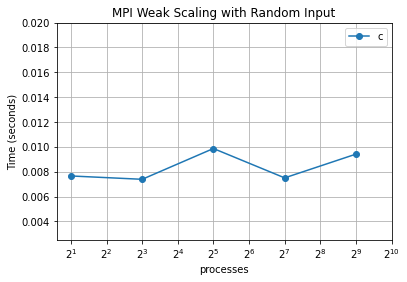

(<Figure size 432x288 with 1 Axes>,
 <Axes: title={'center': 'MPI Weak Scaling with Random Input'}, xlabel='processes', ylabel='Time (seconds)'>)

In [32]:
plot_weak(procs, 
          weak,
          title = "MPI Weak Scaling with Random Input",
          xlabel = "processes",
          ylabel = "Time (seconds)"
         )

In [21]:
# Gets Speedups
temp_df = ctk.dataframe.loc["main"]
temp_df = temp_df.iloc[0] / temp_df
temp_df

(65536, 1%%perturbed) (65536, Random) (65536, ReverseSorted)  \
                  Avg time/rank   Avg time/rank          Avg time/rank   
num_procs                                                                
2                      1.000000        1.000000               1.000000   
4                      1.577259        1.620252               1.370372   
8                      1.167495        1.184386               0.983368   
16                     0.734698        0.780840               0.641978   
32                     0.405997        0.423752               0.349019   
64                     0.402530        0.452877               0.358502   
128                    0.399814        0.412137               0.346160   
256                    0.322271        0.361739               0.295138   
512                    0.232815        0.271266               0.219740   
1024                   0.172724        0.183410               0.153698   

          (65536, Sorted) (262144, 1%%perturbed) (262144, Random)  \
            Avg time/rank          Avg time/rank    Avg time/rank   
num_procs                                                           
2                1.000000               1.000000         1.000000   
4                0.748304               0.757150         1.574338   
8                0.554730               0.575946         1.205462   
16               0.374058               0.374906         0.799052   
32               0.203863               0.205615         0.446264   
64               0.206938               0.213706         0.453955   
128              0.191066               0.196765         0.423502   
256              0.160053               0.164859         0.354481   
512              0.124840               0.131194         0.284498   
1024             0.085782               0.088067         0.187689   

          (262144, ReverseSorted) (262144, Sorted) (1048576, 1%%perturbed)  \
                    Avg time/rank    Avg time/rank           Avg time/rank   
num_procs                                                                    
2                        1.000000         1.000000                1.000000   
4                        1.448781         1.404817                1.369931   
8                        1.036416         1.042964                1.059686   
16                       0.650367         0.653730                0.666223   
32                       0.361269         0.374197                0.394745   
64                       0.380904         0.370020                0.409482   
128                      0.351264         0.346903                0.385995   
256                      0.307704         0.300980                0.325938   
512                      0.229189         0.230029                0.250903   
1024                     0.159333         0.153406                0.149473   

          (1048576, Random) (1048576, ReverseSorted) (1048576, Sorted)  \
              Avg time/rank            Avg time/rank     Avg time/rank   
num_procs                                                                
2                  1.000000                 1.000000          1.000000   
4                  1.817431                 1.387284          1.410833   
8                  1.560837                 1.090377          1.081994   
16                 1.117967                 0.694409          0.728986   
32                 0.641132                 0.394374          0.398464   
64                 0.635216                 0.307546          0.397582   
128                0.621669                 0.378751          0.357847   
256                0.527567                 0.326777          0.314032   
512                0.405231                 0.246894          0.249735   
1024               0.274411                 0.169224          0.166272   

          (4194304, 1%%perturbed) (4194304, Random) (4194304, ReverseSorted)  \
                    Avg time/rank     Avg time/rank            Avg time/rank   
num_procs  

In [22]:
# temp = temp_df.loc[[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]][temp_df.columns[13]]
# list = []
# for i in range(1, 26, 4):
#     list.append(pd.DataFrame(temp_df.loc[[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]][temp_df.columns[i]]))

# result = pd.concat(list)
# result.groupby("num_procs")
# result
# speed_df = pd.DataFrame(list[0], list[1])
# speed_df

# for col in temp_df:
#     print(col[0][1])
    
test = temp_df.loc[[i for i in threads], [col for col in temp_df.columns if col[0][1] == "Random"]]
test

(65536, Random) (262144, Random) (1048576, Random)  \
            Avg time/rank    Avg time/rank     Avg time/rank   
num_procs                                                      
2                1.000000         1.000000          1.000000   
4                1.620252         1.574338          1.817431   
8                1.184386         1.205462          1.560837   
16               0.780840         0.799052          1.117967   
32               0.423752         0.446264          0.641132   
64               0.452877         0.453955          0.635216   
128              0.412137         0.423502          0.621669   
256              0.361739         0.354481          0.527567   
512              0.271266         0.284498          0.405231   
1024             0.183410         0.187689          0.274411   

          (4194304, Random) (16777216, Random) (67108864, Random)  \
              Avg time/rank      Avg time/rank      Avg time/rank   
num_procs                                                           
2                  1.000000           1.000000           1.000000   
4                  1.395599           1.506063           1.450167   
8                  1.146445           1.757439           2.047469   
16                 1.315588           2.267607           2.776557   
32                 0.872388           2.060114           3.344955   
64                 0.903605           2.008480           4.239523   
128                0.861857           2.393777           5.134500   
256                0.785618           2.244542           5.659114   
512                0.597000           1.859701           4.613328   
1024               0.403970           1.291532           4.355866   

          (268435456, Random)  
                Avg time/rank  
num_procs                      
2                    1.000000  
4                    1.413945  
8                    2.043272  
16                   2.924980  
32                   3.930230  
64                   5.171043  
128                  7.247192  
256                  9.248811  
512                  9.544313  
1024                10.875103

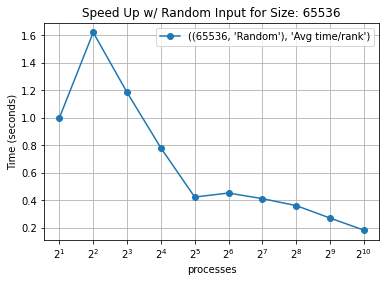

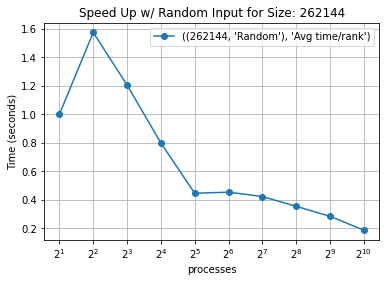

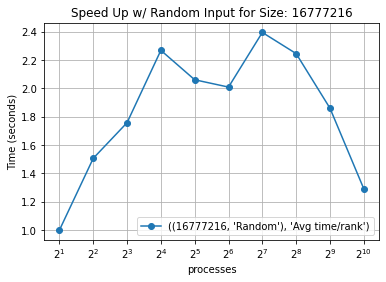

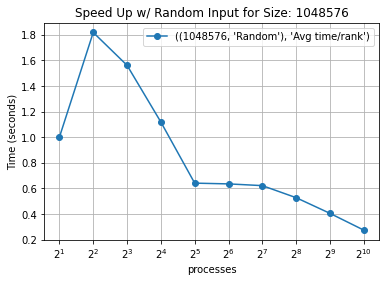

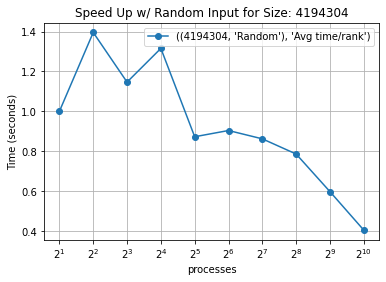

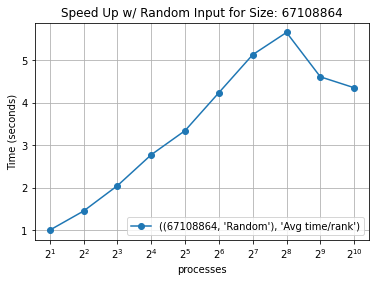

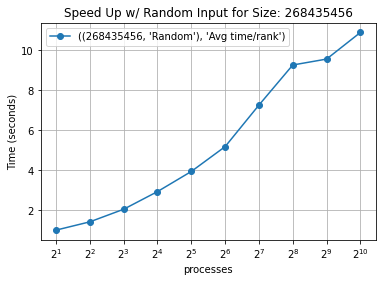

In [23]:
for asize in array_sizes:
    tcols = [col for col in test.columns if col[0][0] == asize]
#     print(tcols)
    plot_mpl(
        df = test.loc[threads][tcols],
        title = f"Speed Up w/ Random Input for Size: {asize}",
        xlabel = "processes",
        ylabel = "Time (seconds)"
    )

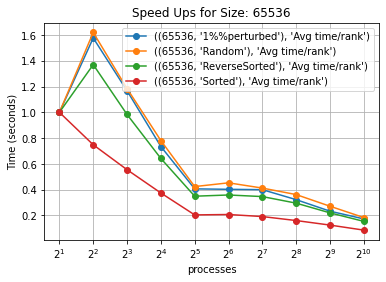

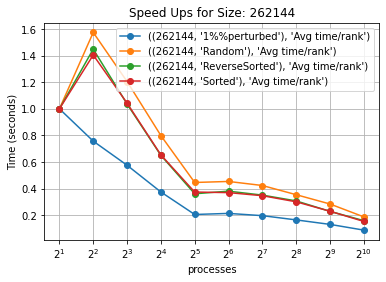

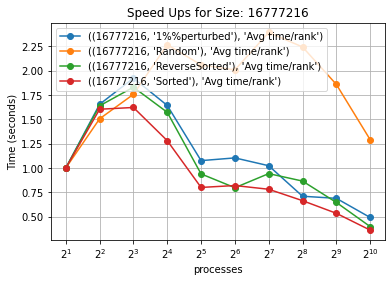

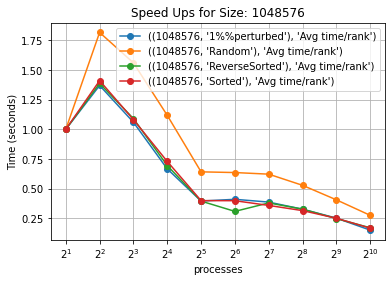

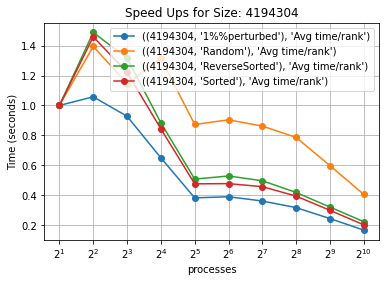

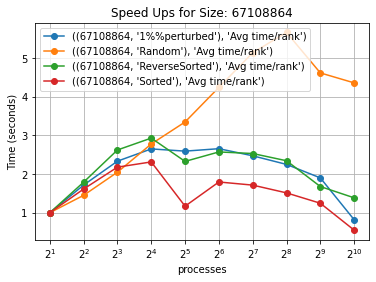

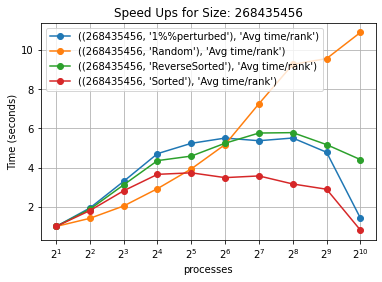

In [29]:
for asize in array_sizes:
    tcols = [col for col in temp_df.columns if col[0][0] == asize]
#     print(tcols)
    plot_mpl(
        df = temp_df.loc[threads][tcols],
        title = f"Speed Ups for Size: {asize}",
        xlabel = "processes",
        ylabel = "Time (seconds)"
    )